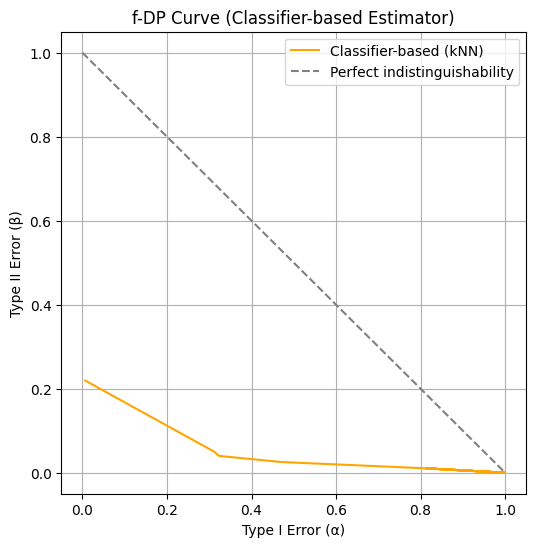

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
os.chdir(project_root)
sys.path.append(os.path.join(project_root, "src"))

from mech.inference_sampler import generate_params, InferenceEstimator

kwargs = generate_params(
    num_samples=10000,
    num_train_samples=8000,
    num_test_samples=2000,
    m=5,
    sigma=1.0,
    h=0.1
)

est_clf = InferenceEstimator(kwargs)
est_clf.build(eta=np.linspace(0.1, 20, 50), classifier_args={'name': 'kNN'})

alphas_clf = np.array(est_clf.output_["alpha"])
betas_clf  = np.array(est_clf.output_["beta"])

plt.figure(figsize=(6, 6))
plt.plot(alphas_clf, betas_clf, color="orange", label="Classifier-based (kNN)")
plt.plot([0,1], [1,0], "--", color="gray", label="Perfect indistinguishability")
plt.title("f-DP Curve (Classifier-based Estimator)")
plt.xlabel("Type I Error (α)")
plt.ylabel("Type II Error (β)")
plt.legend()
plt.grid(True)
plt.show()